# Cuevana3 
#### https://cuevana3.io/
## Informe: Proyecto Segundo Bimestre
### Previo a la realización de este informe se extrajeron datos mediante la técnica de "Scrapy" de las peliculas presentes en la página Cuevana3. Esta página pone a disposicion de sus clientes un total de 2250 películas. De cada película se extrajeron los siguientes datos:
### ·TITULO
### ·Genero
### ·Duracion
### ·Anio
### ·Calificacion
### ·Calidad
### ·Director
### ·Actores

In [1]:
import pandas as pd
import numpy as np
# importar sistema operativo
import os
import sqlite3
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns


columnas = ['TITULO','Genero','Duracion',
            'Anio','','Calificacion',
            'Calidad','Director','Actores']

# leer del original
# df = pd.read_csv(path, usecols = columnas)

#GUARDAR COPIA
path_guardado_pickle = "C://Users//juanc//source//repos//Python//Proyecto2BArania//arania_cuevana//TODO_copia_graficar_y_modificar.pickle"
#df.to_pickle(path_guardado_pickle)

path_guardado_xlsx = 'C://Users//juanc//source//repos//Python//Proyecto2BArania//arania_cuevana//TODO_copia_graficar_y_modificar.xlsx'
path_guardado_tratado_xlsx = 'C://Users//juanc//source//repos//Python//Proyecto2BArania//arania_cuevana//TODO_copia_graficar_y_modificar.xlsx'


#leer el excel del original tratado
df_Todo = pd.read_excel(path_guardado_xlsx)
df_Todo.to_excel(path_guardado_tratado_xlsx, index = False) #Guardar excel

#ver columnas
print(list(df_Todo))
#df_Todo.columns = ['TITULO','Genero','Duracion','Anio','','Calificacion','Calidad','Director','Actores']



### informe con multiples hojas de trabajo ###
calificacion_media = df_Todo['Calificacion'].mean()

estadisticas = {'Promedio de calificacion': calificacion_media}

path_informe = 'C://Users//juanc//source//repos//Python//Proyecto2BArania//arania_cuevana//informe.xlsx'



#pivote genero y calificacion
pivote_genero_calificacion = pd.pivot_table(df_Todo, index=['Genero'], values=['Calificacion'], aggfunc=np.mean)
genero_calificacion = pivote_genero_calificacion.sort_values(by = 'Calificacion', ascending=False)

#pivote genero y calidad
pivote_genero_calidad = pd.pivot_table(df_Todo, index=['Calidad'], values=['Genero'], aggfunc=np.sum)
genero_calidad = pivote_genero_calidad.sort_values(by = 'Calidad', ascending=False)

#pivote calificacion y director
pivote_calificacion_director = pd.pivot_table(df_Todo, index=['Calificacion'], values=['Director'], aggfunc=np.sum)

#pivote genero y director (Directores destacados por generos)
pivote_genero_director = pd.pivot_table(df_Todo, index=['Genero'], values=['Director'], aggfunc=np.sum)
genero_director = pivote_genero_director.sort_values(by = 'Director', ascending=False)

#pivote director y genero (De cada director se muestra su genero)
pivote_director_genero = pd.pivot_table(df_Todo, index=['Director'], values=['Genero'], aggfunc=np.sum)
director_genero = pivote_director_genero.sort_values(by = 'Director', ascending=False)

#anio calificacion
pivote_anio_calificacion = pd.pivot_table(df_Todo, index=['Anio'], values=['Calificacion'])
anio_calificacion = pivote_anio_calificacion.sort_values(by = 'Calificacion', ascending=False)

#calidad calificacion
pivote_calidad_calificacion = pd.pivot_table(df_Todo, index=['Calidad'], values=['Calificacion'])
calidad_calificacion = pivote_calidad_calificacion.sort_values(by = 'Calificacion', ascending=False)

#mejor calificacion por categoria
rat = df_Todo[['Calificacion', 'TITULO', 'Genero']]
mejor_calificacion_por_genero =rat.sort_values(by = 'Calificacion', ascending = False)

# mejor calificacion por director
rat2 = df_Todo[['Calificacion', 'TITULO', 'Director']]
mejor_calificacion_por_director =rat2.sort_values(by = 'Calificacion', ascending = False)

#GUARDANDO EN EL INFORME
#HOJA VERSIONES
writer = pd.ExcelWriter(path_informe, engine='xlsxwriter')  #instancia de writer

df_Todo.to_excel(writer, sheet_name = 'Original', index = False)
df_titulos = df_Todo['TITULO'].value_counts()
calidad_media_categoria = df_Todo['Calidad'].value_counts()
duracion_media = df_Todo['Duracion'].value_counts()
datos_generales = pd.DataFrame(estadisticas, index = [1])
genero_media = df_Todo['Genero'].value_counts()
anio_media = df_Todo['Anio'].value_counts()
director_media = df_Todo['Director'].value_counts()

df_titulos.to_excel(writer, sheet_name = 'Titulos')

calidad_media_categoria.to_excel(writer, sheet_name = 'Calidad')
duracion_media.to_excel(writer, sheet_name = 'Duracion')
datos_generales.to_excel(writer, sheet_name = 'Datos Generales')
genero_media.to_excel(writer, sheet_name = 'Genero')
director_media.to_excel(writer, sheet_name = 'Director')
anio_media.to_excel(writer, sheet_name = 'Anio')

genero_calificacion.to_excel(writer, sheet_name = 'Genero_Calificacion')
genero_calidad.to_excel(writer, sheet_name = 'Genero_Calidad')
pivote_calificacion_director.to_excel(writer, sheet_name = 'Calificacion_Director')
director_genero.to_excel(writer, sheet_name = 'Director_y_su_mejor_genero')
genero_director.to_excel(writer, sheet_name = 'Genero_y_su_mejor_direct')
anio_calificacion.to_excel(writer, sheet_name = 'Anio_Calificacion')
calidad_calificacion.to_excel(writer, sheet_name = 'Calidad_Calificacion')
mejor_calificacion_por_genero.to_excel(writer, sheet_name = 'Calificacion_Genero')
mejor_calificacion_por_director.to_excel(writer, sheet_name = 'Calificacion_Director')

writer.save();


['TITULO', 'Genero', 'Duracion', 'Anio', 'Calificacion', 'Calidad', 'Director', 'Actores']


### Mas de 2100 peliculas tienen calidad HD, algo que los usuarios aprecian bastante.

Text(0, 0.5, 'Cantidad')

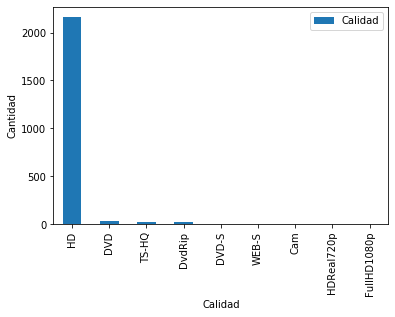

In [9]:
# GRAFICOS
#Calidad
calidad_media_categoria.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')

Text(0.5, 0, 'Calidad')

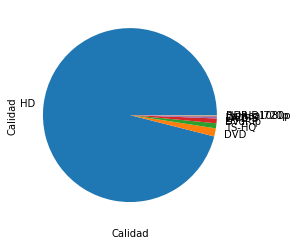

In [7]:
#Calidad
calidad_media_categoria.plot(kind = 'pie')
plt.xlabel('Calidad')

### Las calidades restantes y no tan buenas, estan presentes en una menor cantidad de peliculas. Siendo a penas 34 las peliculas que estan en calidad DVD.

Text(0, 0.5, 'Cantidad')

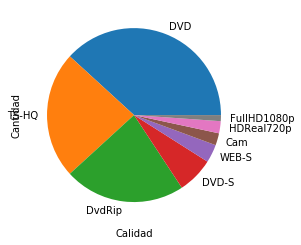

In [9]:
calidad_media_categoria1=calidad_media_categoria.iloc[1:]
calidad_media_categoria1.plot(kind = 'pie')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')

### La duracion tambien suele ser importante para los clientes. La mayoria de peliculas producidas y presentes en esta pagina tienen una duracion de 1h 30m, 1h 40m y 1h 45m.

Text(0, 0.5, 'Cantidad')

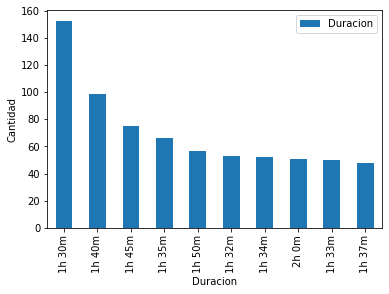

In [14]:
duracion_media1=duracion_media.iloc[1:11]
duracion_media1.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Duracion')
plt.ylabel('Cantidad')

### Se puede establecer que la duracion mas comun para las peliculas esta en el intervalo de 1h 30m y 1h 50m

Text(0, 0.5, 'Cantidad')

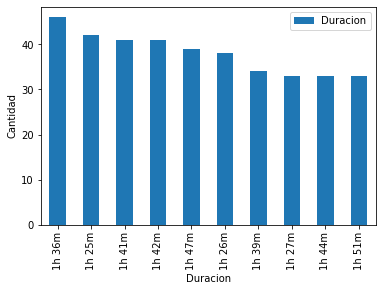

In [15]:
duracion_media2=duracion_media.iloc[12:22]
duracion_media2.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Duracion')
plt.ylabel('Cantidad')

### A continuacion se presentan los generos de las peliculas presentes en Cuevana3.

Text(0, 0.5, 'Cantidad')

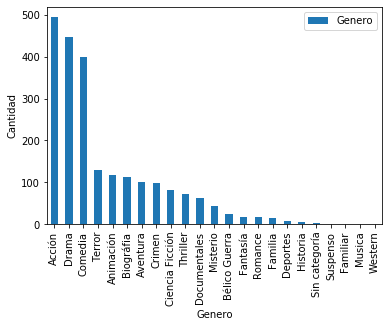

In [77]:
#genero_media
genero_media.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Genero')
plt.ylabel('Cantidad')

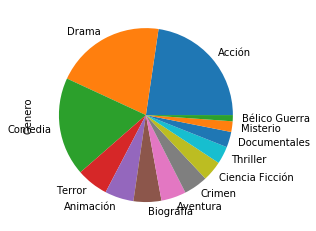

In [84]:
#genero_media
genero_media1 = genero_media.iloc[0:13]
genero_media1.plot(kind = 'pie')

### A continuacion se muestran los directores en funcion de la cantidad de peliculas que tienen publicadas en esta pagina.

Text(0, 0.5, 'Cantidad de Peliculas')

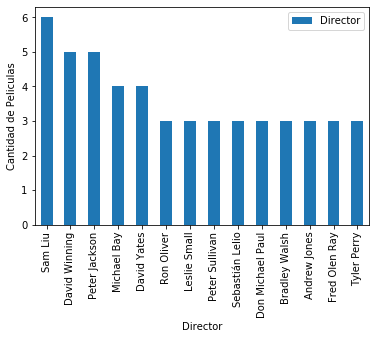

In [20]:
#director_media
director_media1 = director_media.iloc[0:14]
director_media2 = director_media.iloc[15:30]

director_media1.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Director')
plt.ylabel('Cantidad de Peliculas')

Text(0, 0.5, 'Cantidad de Peliculas')

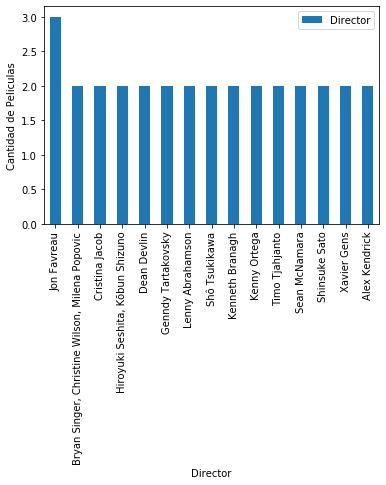

In [21]:
director_media2.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Director')
plt.ylabel('Cantidad de Peliculas')

### A continuacion se muestran loas años de las peliculas presentes en esta pagina, donde se observa una mayoria en el 2018.

Text(0, 0.5, 'Cantidad de peliculas')

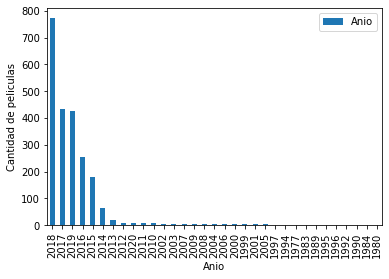

In [22]:
anio_media.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Anio')
plt.ylabel('Cantidad de peliculas')


Text(0.5, 0, 'Anio')

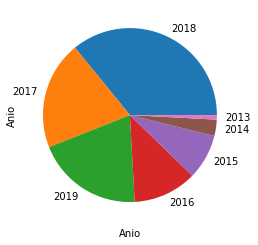

In [68]:
#anio_media
anio_media1 = anio_media.iloc[0:7]
anio_media1.plot(kind = 'pie')
plt.xlabel('Anio')

Text(0.5, 0, 'Anio')

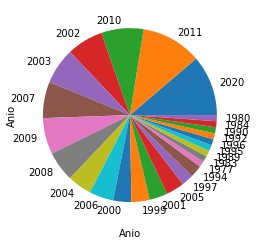

In [69]:
#anio_media
anio_media1 = anio_media.iloc[8:]
anio_media1.plot(kind = 'pie')
plt.xlabel('Anio')

### A continuacion se muestran los generos con el respectivo promedio de calificacion

In [10]:
pivote_genero_calificacion = pd.pivot_table(df_Todo, index=['Genero'], values=['Calificacion'], aggfunc=np.mean)
genero_calificacion = pivote_genero_calificacion.sort_values(by = 'Calificacion', ascending=False)

Text(0, 0.5, 'Cantidad de peliculas')

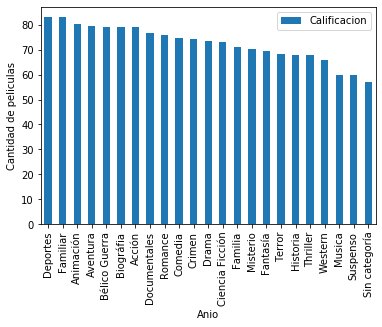

In [11]:
#genero_calificacion
genero_calificacion.plot(kind = 'bar', legend = 'Reverse')
plt.xlabel('Anio')
plt.ylabel('Cantidad de peliculas')